In [1465]:
#Plot the data for fiber twister paper
#ckh 3-29-17 started with data from lab visit
#updated 4/24/17 with model that projects the spiral on an expanding spherical cap, conserving its arclength
#Updated 4/25 with a 3D plot of the spirals. Digging up real material properties to make sure it's 
#in the right range for a first-order model
#Updated 4/26/17 allowing for greater than 90 degree domes as seen in k=2 and k=3

#With real material properties, it lands in the right vicinity, but k =1,2,3 don't line up proportionately w the data
#however the material properties are adjusted.
#You can adjust them to k-values (.56,.82,1.15) that hit most of the data points but aren't proportional 1:2:3 
#It seems strange to tweak the k-value, a variable that we control directly in the pattern. 
#But a smaller effective k might be justified by the idea that the dense mat of threads at the center
#isn't as free to twist as the material closer to the outside
#This messed up area might not scale proportionately with k, and it depends on n too

#The model could improve by calculating the strain energy more rigorously, like accounting for the walls thinning, and integrating
#over the surface as in Yang/Feng paper from 1970 sent by James. 
#Something to do and deal w boundary conditions James mentioned?

#Does the basic model already give any insights that help people design?
#A qualitative explanation is the inextensible threads ride along with the membrane, which can
#take on the "usual" spherical cap shape as long as there is enough slack. 
#The threads accommodate by twisting the surface in the direction that keeps them from extending. 
#You already guessed all this when designing the spiral patterns so can we get anything new? 
#like what happens with a bigger, or thicker/thinner material?

#For comparison to a membrane with no threads maybe we can get by with a reference
#In Google Scholar I saved a paper from the Frecker group that mentions a spherical cap shape for a plain inflated membrane.

import numpy as np

#For the first set of expts I dialed in a pressure on the EFD and waited for the membrane
#to stop inflating. It leaked. Then I had to go back and calibrate what the actual pressures were.
#Note 4-26 I ended up not using the first k=2 data run because I was not confident about the pressure values.
#It went to about the same final angle as the other k=2 membrane but it was displaced along the pressure axis.
k2n24Pressures=np.concatenate((np.arange(0.1,3.6,0.1),np.array([3.75,4.0])))
k2n24Angles=90-np.array([80.0,73.6,68.9,65.0,60.5,58.0,49.0,45.0,38.0,27.4,23.0,19.0,14.8,12.2,10.2,8.7,7,5.3,1.9,-0.2,-1.0,0.2,-7.6,-9.8,-13.0,-14.2,-14.4,-16.8,-19.9,-27.2,-26.2,-28.1,-28.7,-28.3,-28.7,-28.2,-30])
len(k2n24Pressures),len(k2n24Angles)

#For the rest of the experiments I measured the pressures on a gauge that was in the photo.
k1n32Pressures=[0.2,0.4,0.6,0.7,0.92,1.05,1.2,1.45,1.6,1.8,2.1]
k1n32Angles=[0.1,20.6,37.4,48.3,57.9,65.1,69,73.7,75,77,80.2]

k3n18Pressures=[0.15,0.4,0.6,0.75,1,1.2,1.4,1.55,1.75,1.95,2.15,2.35,2.5,2.7,2.75]
k3n18Angles=[0,13.5,42.5,60.1,90.8,107.1,124.4,136.9,141.6,149.2,157.6,162.1,163.9,174.4,176.1]

k2n24s2Pressures=[0.15,0.3,0.55,0.7,0.95,1.25,1.38,1.46,1.65,1.75,1.85]
k2n24s2Angles=[0.0,4.5,25.2,43.9,72.7,90.0,100.4,106.0,109.0,111.0,115.0]

In [1466]:
#Going to make some plots
%matplotlib inline
from matplotlib import pyplot as plt


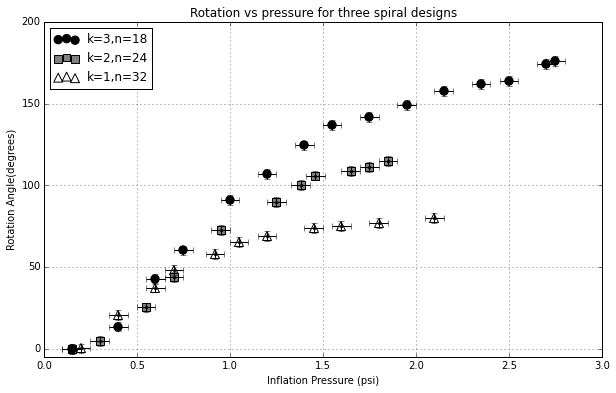

In [1467]:
plt.figure(figsize=[10,6])

plt.hold('True')


#Create error bars for the three samples based on my estimated measurement uncertainty
xerrork1n32=[0.05]*len(k1n32Pressures) #this is corrected pressure error in psi based on uncert of 0.05 on gauge 
yerrork1n32=[3.0]*len(k1n32Angles)#my estimated uncert in reading the angle in degrees from a photo
xerrork2n24s2=[0.05]*len(k2n24s2Pressures) #this is corrected pressure error in psi based on uncert of 0.05 on gauge 
yerrork2n24s2=[3.0]*len(k2n24s2Angles)#my estimated uncert in reading the angle in degrees from a photo
xerrork3n18=[0.05]*len(k3n18Pressures) #this is corrected pressure error in psi based on uncert of 0.05 on gauge 
yerrork3n18=[3.0]*len(k3n18Angles)#my estimated uncert in reading the angle in degrees from a photo

#add data with symbols that will print ok in black/white
#gahhhh I have to plot the error bars and THEN the markers
plt.errorbar(k1n32Pressures,k1n32Angles,yerrork1n32,xerrork1n32,'k.')
data_k1n32=plt.scatter(k1n32Pressures,k1n32Angles,marker='^',facecolor='white',label='k=1,n=32',s=80,linewidths=1.0)

plt.errorbar(k2n24s2Pressures,k2n24s2Angles,yerrork2n24s2,xerrork2n24s2,'k.')
data_k2n24s2=plt.scatter(k2n24s2Pressures,k2n24s2Angles,marker='s',facecolor='gray',label='k=2,n=24',s=60,linewidths=1.0)

plt.errorbar(k3n18Pressures,k3n18Angles,yerrork3n18,xerrork3n18,'k.')
data_k3n18=plt.scatter(k3n18Pressures,k3n18Angles,marker='o',facecolor='black',label='k=3,n=18',s=70,linewidths=1.0)

plt.xlabel('Inflation Pressure (psi)')
plt.ylabel('Rotation Angle(degrees)')
plt.title('Rotation vs pressure for three spiral designs')

axes = plt.gca()
axes.set_xlim([0,3.0])
axes.set_ylim([-5,200])
plt.grid(True)
plt.legend(handles=[data_k3n18,data_k2n24s2,data_k1n32],loc='upper left')
plt.savefig('RotationVPressure.eps')

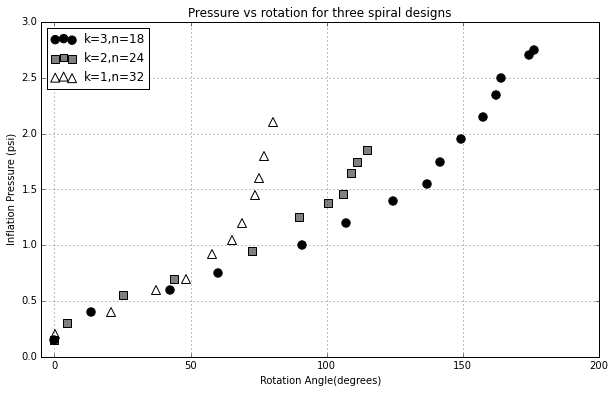

In [1468]:
#invert data plot so it's pressure vs rotation, this is what I am going to try to fit
plt.figure(figsize=[10,6])

plt.hold('True')
#Inverted plot
data2_k1n32=plt.scatter(k1n32Angles,k1n32Pressures,marker='^',facecolor='white',label='k=1,n=32',s=80,linewidths=1.0)

data2_k2n24s2=plt.scatter(k2n24s2Angles,k2n24s2Pressures,marker='s',facecolor='gray',label='k=2,n=24',s=60,linewidths=1.0)

data2_k3n18=plt.scatter(k3n18Angles,k3n18Pressures,marker='o',facecolor='black',label='k=3,n=18',s=70,linewidths=1.0)
plt.ylabel('Inflation Pressure (psi)')
plt.xlabel('Rotation Angle(degrees)')
plt.title('Pressure vs rotation for three spiral designs')

axes = plt.gca()
axes.set_xlim([-5,200])
axes.set_ylim([0,3])
plt.grid(True)
plt.legend(handles=[data_k3n18,data_k2n24s2,data_k1n32],loc='upper left')


In [1469]:
#Here it is modeled as the energy-minimizing angle of an expanding spherical cap, with a cost for areal expansion
#and torsion -- and a reward for increasing volume
#It was easier to calc pressure as a function of angle, this could be inverted when plotting
#The way the spiral is mapped on to the sphere: check out Fig 3 of "On Axisymmetrical Deformations of Nonlinear Membranes"
#where it shows the particle path (right figure where alpha is 0.1). In this figure, the relative distances btw neighboring spiral loops
#would be preserved -- meaning, the particle paths seem to hit the surface at equal arc spacings. The model below maps radial coord of the flat spiral
#to an arclength along a meridian from the center, R* alpha, where alpha is the elevation angle on the spherical cap and R is the radius of the sphere.

#k is the k-number of the spiral pattern 

#Theta is the rotation angle-- what I am putting on the x-axis of the plot to fit

#ideally-- the same parameters g, r0 and tsc should work for all expts regardless of k

from scipy.integrate import quad
from scipy.optimize import fsolve

def arclengthIntegrand(t,theta0,theta):#integrand when solving for arclength of the flat spiral
    return np.sqrt(1+(theta0-theta)**2*t**2)

def arclengthIntegral(theta0,theta): #yessss this gave the same result as formula for arclength of each flat spiral
    return quad(arclengthIntegrand,0,1,args=(theta0,theta))[0]

def funcIntegrand(a,c):#integrand when solving for arclength of the sphere-mapped spiral
    return np.sqrt((c*np.sin(a))**2+1)#it ought to reduce to the flat one but there is a singularity at 0 so have not checked, try it near a=0?

def func(h,*data):#feed func a rotation angle theta, it uses the known arclength of the flat spiral to find 
    #the center height h of a spherical cap that the same-arclength spiral maps onto at that value of theta
    r0,k,theta=data #r0 is the fixture radius and k is the Steven k-value of the spiral
    theta0=2*np.pi*k*0.44#convert Steven-style k to max twist angle theta0
    Lr0=arclengthIntegral(theta0,0) #arclength of flat spiral divided by fixture radius
    Rr0=(h/r0+r0/h)/2  #Radius of sphere that forms spherical cap, divided by fixture radius
    if (h<r0):#cap is less than a hemisphere
        a0=np.arcsin(1/Rr0)#alpha is the elevation angle in spherical coords, it starts at 0 at the center of the cap and 
        #goes to a0 at the edge
    else: #center height h bigger than the fixture radius, means it's an Epcot Center dome
        a0=np.pi/2+np.arccos(1/Rr0)#different formula in this case, a0 is greater than 90 deg     
    c=(theta0-theta)/a0 #Delta theta / delta alpha is a constant over the surface of the sphere
            #This constant c is analogous to the 2pi*k in the  formula for theta(t) in the flat spiral
    SpiralMappedLength=Rr0*quad(funcIntegrand,0,a0,args=(c,))[0] 
        
    return SpiralMappedLength-Lr0 #This result should go to zero for the h that makes the arclength match the known value


def pfuncB(g,r0,tsc,s,dhdt,h,theta):#pressure as a function of fitting params, k and theta - uses precalculated
    #h and dh/dt arrays.
    #g, r0, tsc,s are fitting parameters: g is energy per membrane area, r0 is fixture radius in units of length
    #tsc is torsional spring constant and s scales everything, im using it to go from pascals to psi
    p=np.zeros((len(dhdt),))#pressure array to calculate
    for i in range(len(dhdt)):
        #p[i]=(g*2*np.pi*h[i]*dhdt[i]+tsc*theta[i]*2*np.pi/180)/(np.pi/2*(r0**2+h[i]**2)*dhdt[i])#this one is the original with strain energy proportional to area. but a flat membrane should have 0 strain energy
        p[i]=(g*2*(2*(h[i]/r0)**2+1)*np.pi*h[i]*dhdt[i]+tsc*theta[i]*2*np.pi/180)/(np.pi/2*(r0**2+h[i]**2)*dhdt[i])#in this one, strain energy is proportional to (area change) * area
    return s*np.array(p)

In [1481]:
rotangle1=np.linspace(1,82,80)#angles for plotting
rotangle2=np.linspace(1,116,80)
rotangle3=np.linspace(1,163,80)
dotangle1=np.linspace(79,87,20)##can use these to draw a dotted line where the model gets less valid
dotangle2=np.linspace(114,125,50)
dotangle3=np.linspace(161,177,40)

In [1482]:
pstart=0.15#I'm getting 0 rotation at 0.15 psi because that's what the gauge said at room pressure

g=30#energy/surface area term J/m^2 should be in the range of first Yeoh coefficient C10* material thickness
#Kulkarni thesis has C10 of 1.27e-2 MPa for EcoFlex 30, and our membrane starts 3mm thick
#It gets thinner during inflation,  but this is a first order model. 
#1e-4 J/m^3*0.003m=30 J/m^2 maybe a little smaller because we have EcoFlex 10

r0=.038#fixture radius in meters-- I have that the fixture hole was 76 mm across

#tsc is torsional spring constant in SI units. expts had it in the range of 0.5 mNm/deg which is 0.028 Nm/radian
tsc=0.028 #I measured similar torsional spring constants on all 3 membranes, but the k=1 was larger than the others

s=14.7/101325 #s scales result to psi from pascals

#calculate heights to compare to photos
k1=0.56 #adjust k values to meet data
k2=0.82
k3=1.12

h1=np.array([fsolve(func,0.035,args=(r0,k1,theta*np.pi/180))[0] for theta in rotangle1])#second arg is a starting guess
h2=np.array([fsolve(func,0.035,args=(r0,k2,theta*np.pi/180))[0] for theta in rotangle2])#for the center height h in meters
h3=np.array([fsolve(func,0.035,args=(r0,k3,theta*np.pi/180))[0] for theta in rotangle3])
dhdt1=np.diff(h1)/(np.diff(rotangle1)[0]*np.pi/180)
dhdt2=np.diff(h2)/(np.diff(rotangle2)[0]*np.pi/180)
dhdt3=np.diff(h3)/(np.diff(rotangle3)[0]*np.pi/180)
p1=pfuncB(g,r0,tsc,s,dhdt1,h1,rotangle1)+pstart  #g,ro,tsc
p2=pfuncB(g,r0,tsc,s,dhdt2,h2,rotangle2)+pstart
p3=pfuncB(g,r0,tsc,s,dhdt3,h3,rotangle3)+pstart


#calculate farther out points
h1dash=np.array([fsolve(func,0.035,args=(r0,k1,theta*np.pi/180))[0] for theta in dotangle1])#second arg is a starting guess
h2dash=np.array([fsolve(func,0.035,args=(r0,k2,theta*np.pi/180))[0] for theta in dotangle2])#for the center height h in meters
h3dash=np.array([fsolve(func,0.035,args=(r0,k3,theta*np.pi/180))[0] for theta in dotangle3])
dhdtdash1=np.diff(h1dash)/(np.diff(dotangle1)[0]*np.pi/180)
dhdtdash2=np.diff(h2dash)/(np.diff(dotangle2)[0]*np.pi/180)
dhdtdash3=np.diff(h3dash)/(np.diff(dotangle3)[0]*np.pi/180)
p1dash=pfuncB(g,r0,tsc,s,dhdtdash1,h1dash,dotangle1)+pstart  #g,ro,tsc
p2dash=pfuncB(g,r0,tsc,s,dhdtdash2,h2dash,dotangle2)+pstart
p3dash=pfuncB(g,r0,tsc,s,dhdtdash3,h3dash,dotangle3)+pstart

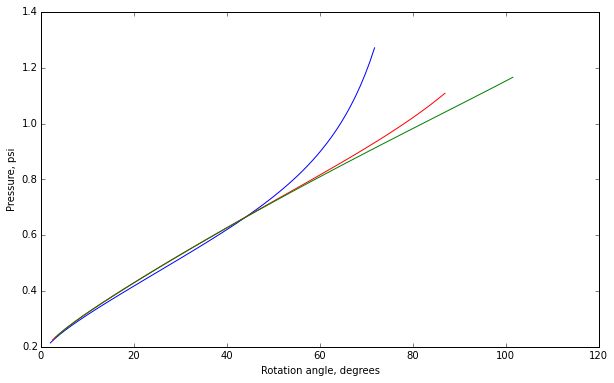

In [1483]:
plt.figure(figsize=[10,6])
plt.plot(rotangle1[1:70],p1[1:70],'b')
plt.hold(True)
plt.plot(rotangle2[1:60],p2[1:60],'r')
plt.plot(rotangle3[1:50],p3[1:50],'g')
plt.ylabel('Pressure, psi')
plt.xlabel('Rotation angle, degrees')

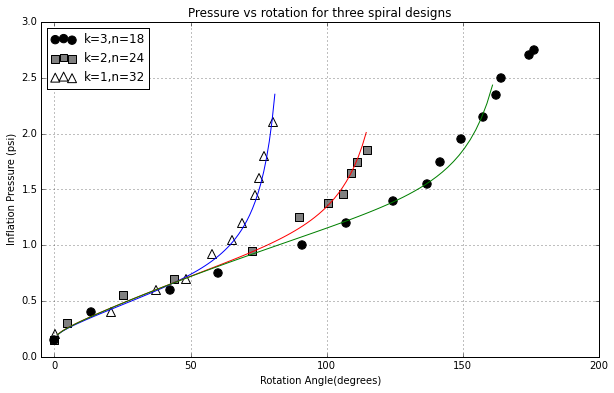

In [1484]:
plt.figure(figsize=[10,6])
plt.plot(rotangle1[:-1],p1,'b')
plt.hold(True)
plt.plot(rotangle2[:-1],p2,'r')
plt.plot(rotangle3[:-1],p3,'g')

#Inverted plot
data2_k1n32=plt.scatter(k1n32Angles,k1n32Pressures,marker='^',facecolor='white',label='k=1,n=32',s=80,linewidths=1.0)

data2_k2n24s2=plt.scatter(k2n24s2Angles,k2n24s2Pressures,marker='s',facecolor='gray',label='k=2,n=24',s=60,linewidths=1.0)

data2_k3n18=plt.scatter(k3n18Angles,k3n18Pressures,marker='o',facecolor='black',label='k=3,n=18',s=70,linewidths=1.0)
plt.ylabel('Inflation Pressure (psi)')
plt.xlabel('Rotation Angle(degrees)')
plt.title('Pressure vs rotation for three spiral designs')

plt.grid(True)
axes = plt.gca()
axes.set_xlim([-5,200])
axes.set_ylim([0,3])
plt.legend(handles=[data_k3n18,data_k2n24s2,data_k1n32],loc='upper left')


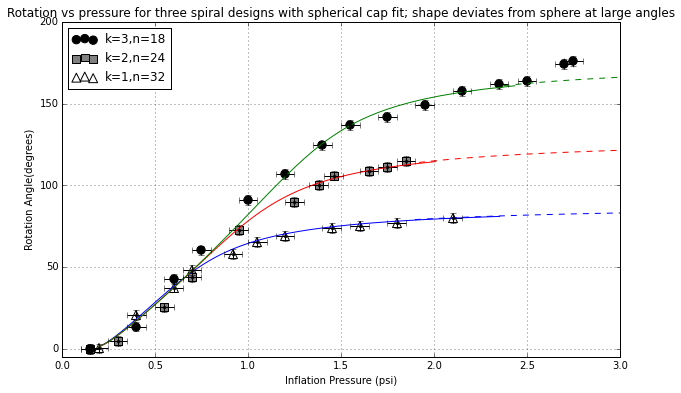

In [1488]:
#Un-inverted plot 
plt.figure(figsize=[10,6])
plt.plot(p1,rotangle1[:-1],'b')
plt.hold(True)
plt.plot(p2,rotangle2[:-1],'r')
plt.plot(p3,rotangle3[:-1],'g')

#dashed line for the crummier region
plt.plot(p1dash,dotangle1[:-1],'b--')
plt.plot(p2dash,dotangle2[:-1],'r--')
plt.plot(p3dash,dotangle3[:-1],'g--')

#Plot data Un-inverted like in the beginning - with error bars - Rotation vs pressure
data2_k1n32=plt.scatter(k1n32Pressures,k1n32Angles,marker='^',facecolor='white',label='k=1,n=32',s=80,linewidths=1.0)
plt.errorbar(k1n32Pressures,k1n32Angles,yerrork1n32,xerrork1n32,'k.')

plt.errorbar(k2n24s2Pressures,k2n24s2Angles,yerrork2n24s2,xerrork2n24s2,'k.')
data2_k2n24s2=plt.scatter(k2n24s2Pressures,k2n24s2Angles,marker='s',facecolor='gray',label='k=2,n=24',s=60,linewidths=1.0)

plt.errorbar(k3n18Pressures,k3n18Angles,yerrork3n18,xerrork3n18,'k.')
data2_k3n18=plt.scatter(k3n18Pressures,k3n18Angles,marker='o',facecolor='black',label='k=3,n=18',s=70,linewidths=1.0)

plt.xlabel('Inflation Pressure (psi)')
plt.ylabel('Rotation Angle(degrees)')
plt.title('Rotation vs pressure for three spiral designs with spherical cap fit; shape deviates from sphere at large angles')

plt.grid(True)
axes = plt.gca()
axes.set_ylim([-5,200])
axes.set_xlim([0,3])
plt.legend(handles=[data2_k3n18,data2_k2n24s2,data2_k1n32],loc='upper left')
plt.savefig('RotationVPressureSphereFit.eps')

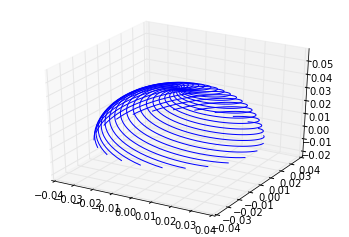

(0.038010655001977381,
 0.037110714070944635,
 102.89873417721519,
 5.529203070318036,
 88.643337357354213,
 0.038)

In [1487]:
#Select a mapped spiral for 3D plotting
j=70
h=h2[j]#get a height
k=2 #keep it together with the k value that created it better
theta0=2*np.pi*k*0.44#convert k to max twist angle theta0
theta=rotangle2[j]
R=(h/r0+r0/h)/2*r0  #Radius of sphere that forms spherical cap

if(h<r0):
    a0=np.arcsin(r0/R) #Largest elevation angle alpha
else:
    a0=np.pi/2+np.arccos(r0/R)#went bigger than half sphere
    
alph=np.linspace(0,a0,50) #Elevation angle alpha will be the parameter for this plot
phi=[(theta0-theta*np.pi/180)*al/a0 for al in alph]  #azimuthal coord
x1=np.zeros((len(alph),))
y1=np.zeros((len(alph),))
z1=np.zeros((len(alph),)) #UUUUGHGGGHHH why dos this take up so much time and spac3


for i in range(len(alph)):
    x[i]=R*np.sin(alph[i])*np.cos(phi[i])
    y[i]=R*np.sin(alph[i])*np.sin(phi[i])
    z[i]=R*np.cos(alph[i])-(R-h)
    
    
#define some coordinate conversions numpy doesnt have that will let me rotate the x-y coords
def cart2pol(x, y):
    rho = np.sqrt(x**2 + y**2)
    phi = np.arctan2(y, x)
    return(phi,rho)

def pol2cart(phi, rho):
    x = rho * np.cos(phi)
    y = rho * np.sin(phi)
    return(x, y)

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax=fig.gca(projection='3d') #use for 2D plot
#ax=fig.gca() #use this for 2d projections
ax.hold(True)

N=24
for n in range(N): #How many equal spaced spirals to plot?
    phiSpiral=np.array([cart2pol(xout,yout)[0] for (xout,yout) in zip(x,y)])+2*np.pi*n/N #rotate the spiral
    rhoSpiral=np.array([cart2pol(xout,yout)[1] for (xout,yout) in zip(x,y)])
    newx=[pol2cart(phiOut,rhoOut)[0] for (phiOut,rhoOut) in zip(phiSpiral,rhoSpiral)]
    newy=[pol2cart(phiOut,rhoOut)[1] for (phiOut,rhoOut) in zip(phiSpiral,rhoSpiral)]
    ax.plot(newx, newy,z,'b') #use for 3D plot
    #ax.plot(newx,z) #2D projection
    


#ax.axis('equal') #this is not working to make the z axis equal! it is all distorted   
def set_aspect_equal_3d(ax):
    """Fix equal aspect bug for 3D plots."""
    xlim = ax.get_xlim3d()
    ylim = ax.get_ylim3d()
    zlim = ax.get_zlim3d()

    from numpy import mean
    xmean = mean(xlim)
    ymean = mean(ylim)
    zmean = mean(zlim)

    plot_radius = max([abs(lim - mean_)
                       for lims, mean_ in ((xlim, xmean),
                                           (ylim, ymean),
                                           (zlim, zmean))
                       for lim in lims])

    ax.set_xlim3d([xmean - plot_radius, xmean + plot_radius])
    ax.set_ylim3d([ymean - plot_radius, ymean + plot_radius])
    ax.set_zlim3d([zmean - plot_radius, zmean + plot_radius])
    
set_aspect_equal_3d(ax) #use for 3D plot
#ax.axis('equal') #use for 2D projection
ax.legend()

plt.show()
R,h,theta,theta0,a0*180/np.pi,r0


#This spherical projection of the spiral produces shapes that resemble the pressure data, and will let us discuss arclength conservation.
#The approx measured value of the torsional spring constant was used, it was in the range of 0.025-1 Nm/radian 
#Then I adjusted the area cost to be about 30 J/m2, checked against papers James sent
#If I lowered the k values they start to line up better with the data points. 
#Checked on units of everything in the pressure formula so it works out to Pa
#Would be a good check to 3d plot the spiral shape or at least, some 2d projections from these coords. -done
#We see spherical "Epcot Center" shapes beyond 1.4 psi with k=2 and even lower with k=3, I made it handle those shapes
#Even then it can't capture the part where the k=3 spiral starts to go cone shaped, that is a thing to note on the plot.
